In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay, classification_report, f1_score, recall_score
import nltk
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import string
from string import punctuation
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns
df = pd.read_csv('rzcsvfinal.csv')
df
df.duplicated().sum()
df['Label'] = df['Label'].replace('ham', 0, regex=True)
df['Label'] = df['Label'].replace('spam', 1, regex=True)
ps=PorterStemmer()
ps.stem('dancing')
def transform_Msg(Msg):
    Msg=Msg.lower()
    Msg = nltk.word_tokenize(Msg)

    y = []
    for i in Msg:
        if i.isalnum():
            y.append(i)

    Msg = y[:] 
    y.clear()

    for i in Msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Msg = y[:]
    y.clear()

    for i in Msg:
        y.append(ps.stem(i))

    
    return " ".join(y)
    

C:\Users\hp\AppData\Local\Temp\ipykernel_11020\1792913463.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('spam', 1, regex=True)


In [2]:
import re

# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the 'Msg' column to remove numbers
df['Msg_cleaned'] = df['Msg'].apply(remove_numbers)

In [3]:
df['transformed_Msg'] = df['Msg_cleaned'] .apply(transform_Msg)
df.head()

,Msg,Label,Msg_cleaned,transformed_Msg
0,CONGRATULATIONS! FREE 2GB data is yours! \nCla...,1,CONGRATULATIONS! FREE GB data is yours! \nClai...,congratul free gb data claim airtel thank app ...
1,Hi! Thank you for being with Vi-India's FASTES...,1,Hi! Thank you for being with Vi-India's FASTES...,hi thank fastest g love improv click http shar...
2,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",1,"As part of Cyber Swachhta Pakhwada, CERT-In Go...",part cyber swachhta pakhwada goi advis keep di...
3,I will try to manage took tablets,0,I will try to manage took tablets,tri manag took tablet
4,Study from Home with Vi!! Watch Kite Victers C...,1,Study from Home with Vi!! Watch Kite Victers C...,studi home vi watch kite victer channel free m...


In [4]:
X = df['transformed_Msg']
y = df['Label']
X


0       congratul free gb data claim airtel thank app ...
1       hi thank fastest g love improv click http shar...
2       part cyber swachhta pakhwada goi advis keep di...
3                                   tri manag took tablet
4       studi home vi watch kite victer channel free m...
                              ...                        
2222                                             join min
2223    enjoy unlimit local std roam call network dail...
2224                                        fix join asap
2225    exclus offer day free airtel xstream fiber cha...
2226    pickup onlin awb done want later queri call fe...
Name: transformed_Msg, Length: 2227, dtype: object

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_ngrams, y, test_size=0.2, random_state=2)


In [19]:
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Use unigrams and bigrams
X_ngrams = vectorizer.fit_transform(X)

In [21]:
model = BernoulliNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy: 0.9820627802690582
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       301
           1       1.00      0.94      0.97       145

    accuracy                           0.98       446
   macro avg       0.99      0.97      0.98       446
weighted avg       0.98      0.98      0.98       446



In [22]:
ngram_features = vectorizer.get_feature_names_out()

# Display the n-gram features
print("N-gram Features:")
print(ngram_features)

for feature in ngram_features:
    print(feature)

N-gram Features:
['aadhaar' 'aadhaar centr' 'aadhaar enrol' ... 'zone' 'zone reddi'
 'zwfqjnnnn']
aadhaar
aadhaar centr
aadhaar enrol
aadhaar free
aagey
aagey never
aaj
aaj tak
aanandam
aanandam paramanandam
aanu
aanu njangalud
aati
aati hai
aayrikkum
aayrikkum vodafon
ab
ab aur
ab year
abhishek
abhishek bachchan
abl
abl call
abl connect
abl join
abl log
abl login
abl open
abl reach
abl rise
abl sell
abl talk
abl think
abl use
abl work
abp
abp ananda
abroad
abroad worri
ac
ac air
ac block
acc
acc xxx
accept
accept make
access
access activ
access ad
access channel
access even
access hotstar
access listen
access live
access mail
access ott
access outlook
access sonyliv
access support
access team
access tv
access watch
access wynk
accessori
accessori earn
accessori get
accessori homewar
accessori shop
accessori use
accord
accord commerc
accord perform
accord plan
accordingli
accordingli although
account
account activ
account appli
account block
account day
account friday
account lock
acco

In [23]:
# Sum the occurrences of each n-gram across all messages
ngram_frequencies = np.asarray(X_ngrams.sum(axis=0)).flatten()



In [24]:
# Create a DataFrame with n-grams and their corresponding frequencies
ngram_df = pd.DataFrame({'ngram': ngram_features, 'frequency': ngram_frequencies})

In [25]:
ngram_df_sorted = ngram_df.sort_values(by='frequency', ascending=False)

# Display the top 30 most occurring non-numerical n-gram features
print(ngram_df_sorted.head(30))

         ngram  frequency
2057     click        409
10361       rs        327
4772       get        301
4512      free        253
7159    market        221
2806      data        203
284     airtel        184
2893       day        174
11656    stock        169
8274     offer        166
5544      http        166
1583      call        159
13018  unlimit        150
560        app        146
12253    thank        137
12466    today        133
12123     team        133
5310        hi        125
9078     point        125
9837   recharg        125
6155      join        123
11021     shop        118
8626      pack        114
13363       vi        113
11750    store         97
3644     enjoy         97
4734        gb         90
12726    trend         87
4966      good         82
12455      tnc         81


Confusion Matrix on Test Data:
 [[301   0]
 [  8 137]]


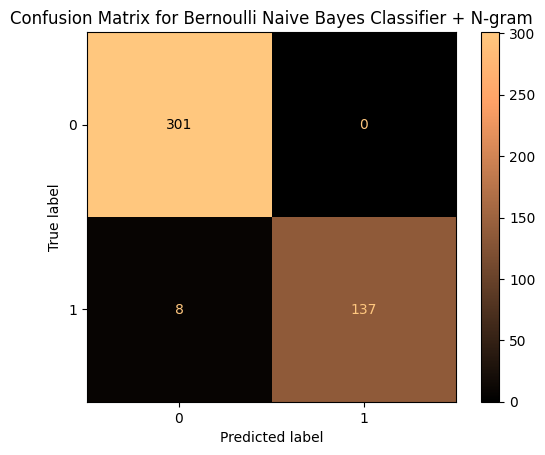

In [26]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix on Test Data:\n", confusion_matrix(y_test,y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.copper)
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier + N-gram')
plt.show()

In [27]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9820627802690582
1.0
0.9448275862068966
0.9716312056737588
